In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

### Load the dataset


In [2]:
# Load data set
churn = pd.read_csv('C:/Users/vumac/Desktop/Springboard_Capstone2/Dataset/BankChurners_cleaned.csv', index_col=0)

### Feature information¶
CLIENTNUM: Client number. Unique identifier for the customer holding the account<br />
Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1(Attrited Customer) else 0(Existing Customer)<br />
Customer_Age: Demographic variable - Customer's Age in Years <br />
Gender: Demographic variable - M=Male, F=Female<br />
Dependent_count: Demographic variable - Number of dependents<br />
Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)<br />
Marital_Status: Demographic variable - Married, Single, Divorced, Unknown<br />
Income_Category: Demographic variable - Annual Income Category of the account holder ( 40𝐾, 40K - 60K, 60𝐾− 80K, 80𝐾− 120K, $ 120K, Unknown)<br />
Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)<br />
Months_on_book: Period of relationship with bank<br />
Total_Relationship_Count: Total no. of products held by the customer<br />
Months_Inactive_12_mon: No. of months inactive in the last 12 months<br />
Contacts_Count_12_mon: No. of Contacts in the last 12 months <br />
Credit_Limit: Credit Limit on the Credit Card <br />
Total_Revolving_Bal: Total Revolving Balance on the Credit Card <br />
Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months) <br />
Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1) <br />
Total_Trans_Amt: Total Transaction Amount (Last 12 months) <br />
Total_Trans_Ct: Total Transaction Count (Last 12 months) <br />
Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) <br />
Avg_Utilization_Ratio: Average Card Utilization Ratio <br />

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [4]:
churn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,60K - 80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than 40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,80K - 120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than 40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,60K - 80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Categorical Features

In [5]:
churn_cat = churn.select_dtypes('object')

In [6]:
churn_cat

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,60K - 80K,Blue
1,Existing Customer,F,Graduate,Single,Less than 40K,Blue
2,Existing Customer,M,Graduate,Married,80K - 120K,Blue
3,Existing Customer,F,High School,NaN,Less than 40K,Blue
4,Existing Customer,M,Uneducated,Married,60K - 80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,40K - 60K,Blue
10123,Attrited Customer,M,NaN,Divorced,40K - 60K,Blue
10124,Attrited Customer,F,High School,Married,Less than 40K,Blue
10125,Attrited Customer,M,Graduate,NaN,40K - 60K,Blue


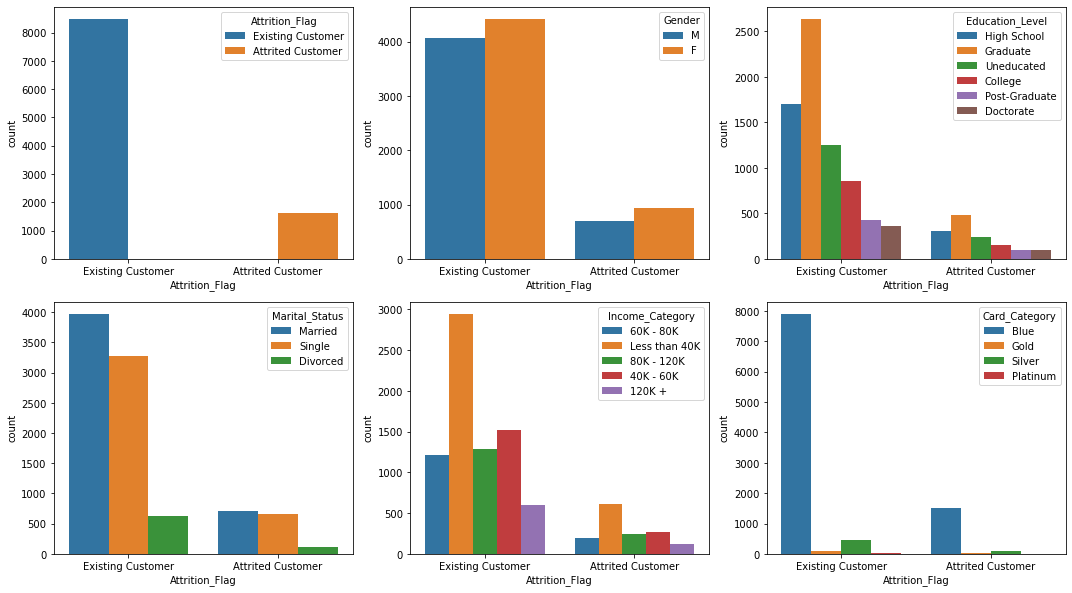

In [7]:
# Explore count plots on the target feature with every categorical independent features
# It seems like there is no specific customer type that has a noticeble churning counts 
# The churning number of each customer type seems consistent with the total customers of that type, except for Single and Doctorate type.

plt.figure(figsize=(15,12))
for i in range(len(churn_cat.columns)):
    plt.subplot(3, 3, i+1)
    sns.countplot('Attrition_Flag', hue=churn_cat.columns[i], data=churn_cat)
plt.tight_layout()

In [8]:
# Percentage of churning per each customer type
# Most values are between 14% to 18%
# Platinum card customers have highest drop rate at 25%, second highest is Doctorate type at 21%
# Lowest churning rate is 13.5%, which is customers with income 60K-80K

for i in range(len(churn_cat.columns)-1):
    table = pd.crosstab(churn_cat.Attrition_Flag, churn_cat[churn_cat.columns[i+1]], normalize='columns')
    print('\n')
    print(table)



Gender                    F         M
Attrition_Flag                       
Attrited Customer  0.173572  0.146152
Existing Customer  0.826428  0.853848


Education_Level     College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                                 
Attrited Customer  0.152024   0.210643  0.155691     0.152012       0.178295   
Existing Customer  0.847976   0.789357  0.844309     0.847988       0.821705   

Education_Level    Uneducated  
Attrition_Flag                 
Attrited Customer    0.159381  
Existing Customer    0.840619  


Marital_Status     Divorced   Married    Single
Attrition_Flag                                 
Attrited Customer  0.161765  0.151269  0.169414
Existing Customer  0.838235  0.848731  0.830586


Income_Category      120K +  40K - 60K  60K - 80K  80K - 120K  Less than 40K
Attrition_Flag                                                              
Attrited Customer  0.173315   0.151397   0.13

In [9]:
# Take a closer look at platinum card users
# There are only 5 platinum card users who churned (25%). Total platinum card users are 20. 
# The sample is too small, this may happen by chance.


churn[(churn.Attrition_Flag == 'Attrited Customer') & (churn.Card_Category == 'Platinum')]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3800,Attrited Customer,51,F,2,Doctorate,Married,Less than 40K,Platinum,42,3,2,3,15987.0,193,15794.0,0.435,2021,46,0.394,0.012
8863,Attrited Customer,43,M,3,Post-Graduate,Married,40K - 60K,Platinum,31,2,3,4,23981.0,593,23388.0,0.987,4758,65,0.512,0.025
9068,Attrited Customer,54,F,0,Graduate,Single,NaN,Platinum,38,2,2,2,34516.0,0,34516.0,0.695,3901,54,0.421,0.000
9102,Attrited Customer,51,F,2,Graduate,Single,NaN,Platinum,32,2,3,3,34516.0,531,33985.0,0.980,5418,65,0.711,0.015
9183,Attrited Customer,48,F,4,Graduate,Single,Less than 40K,Platinum,37,5,3,4,15987.0,0,15987.0,0.827,7681,71,0.690,0.000


In [10]:
# Cramér's V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). 
# Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association.
# The function was adapted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

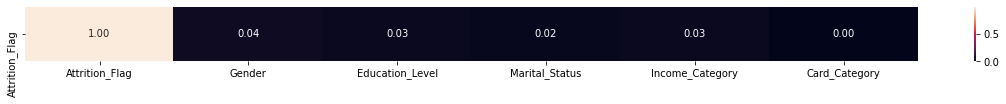

In [11]:
# Heatmap between categorical features using Cramér's V
# There are weak relationships between categorial features and the target features.
# Card_Category seems to have no relationship at all.

churn_cat_corr = pd.DataFrame(index=['Attrition_Flag'],columns=churn_cat.columns)
columns = churn_cat.columns
for j in range(0, len(columns)):
    u = cramers_v(churn_cat.Attrition_Flag, churn_cat[columns[j]])
    churn_cat_corr.loc[:, columns[j]] = u
churn_cat_corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(churn_cat_corr,annot=True,fmt='.2f')
plt.show()

In [12]:
# Perform Chi-square test on Card_Category
# p value = 0.53, we accept the null hypothesis of no relationship between Attrition_Flag and Card_Category

chi2, p, dof, ex = ss.chi2_contingency(pd.crosstab(churn_cat.Attrition_Flag, churn_cat.Card_Category))
chi2, p

(2.2342267000046805, 0.5252382797994759)

## Numerical Features

In [13]:
# Select numerical features and target features to explore

churn_num = churn.select_dtypes('number')
churn_num['Attrition_Flag'] = churn.Attrition_Flag

In [14]:
# Create 2 dataframe with existing customer or attrited customer only

churn1 = churn[churn.Attrition_Flag=='Attrited Customer']
non_churn = churn[churn.Attrition_Flag=='Existing Customer']

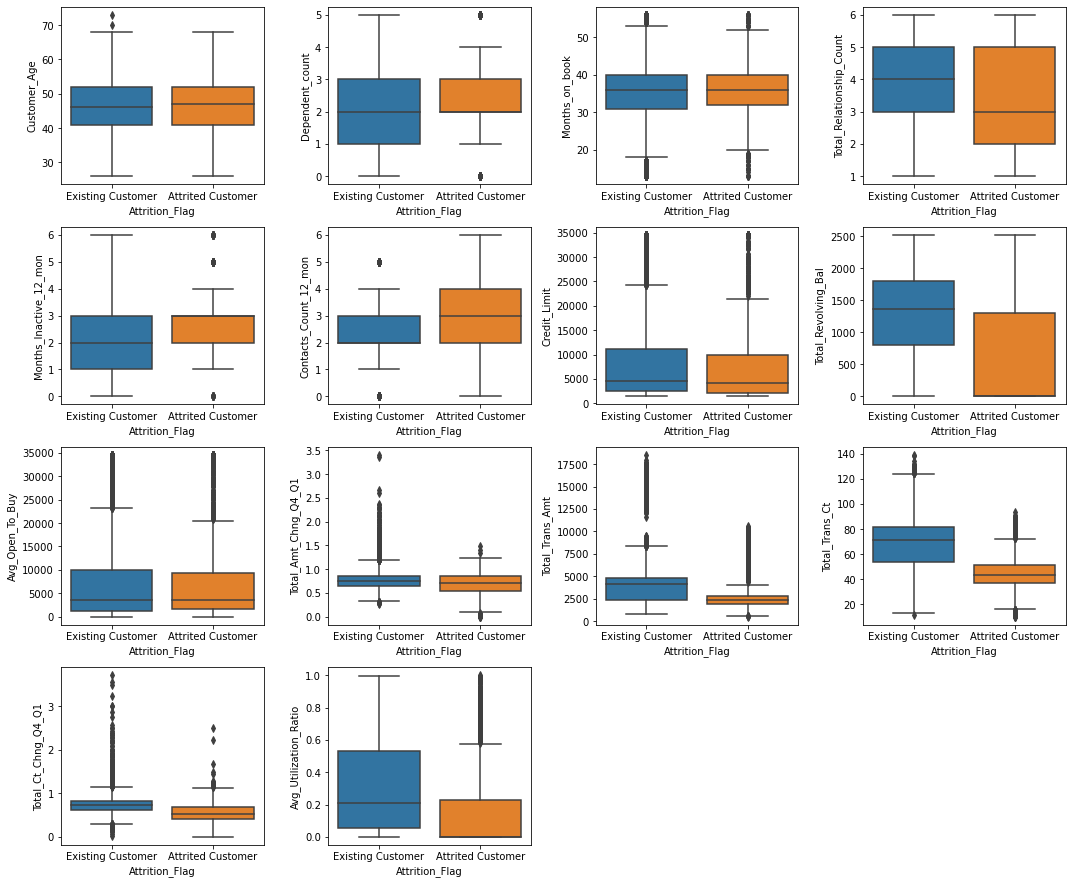

In [15]:
# The target feature has binary values, so boxplot is utilized to explore the independent variables
# Variables seem to have no relationship with Attrition_Flag are Customer_Age, Months_on_book, Credit_Limit, Avg_Open_to_Buy
# Variables that have strong relationship with Attrition_Flag are Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Change_Q4_Q1, Avg_Utilization_Ratio

plt.figure(figsize=(15, 15))
for i in range(len(churn_num.columns)-1):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='Attrition_Flag', y=churn_num.columns[i], data=churn_num)
plt.tight_layout()

### Discrete numerical variables

#### Dependent_Count

In [16]:
# Percentage of churning customers with number of dependent  
# Customers with 3 or 4 have a small higher rate of churning, but not significant

pd.crosstab(churn.Attrition_Flag, churn.Dependent_count, normalize='columns')

Dependent_count,0,1,2,3,4,5
Attrition_Flag,,,,,,
Attrited Customer,0.149336,0.146355,0.157062,0.176428,0.165184,0.150943
Existing Customer,0.850664,0.853645,0.842938,0.823572,0.834816,0.849057


#### Months_on_book

In [17]:
# Do long time card users have lower rate of churning? The answer is No
# Length of using cards has no thing to do with customers churning

churn.groupby('Attrition_Flag')['Months_on_book'].mean()

Attrition_Flag
Attrited Customer    36.178242
Existing Customer    35.880588
Name: Months_on_book, dtype: float64

In [18]:
# Mimimum months_on_book is 13 months and interquartile range is 31 to 40 months. 
# This dataset is a good predictor for customers within this range, it maynot predict well customers with longer time using the services.

churn.Months_on_book.describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

#### Total_Relationship_Count

In [19]:
# We expect customers the more products held by the customers, the lower churning rate
# The values are as expected, customers with 1 or 2 products have more than double churning rate compared to customers with 4 or more products

pd.crosstab(churn.Attrition_Flag, churn.Total_Relationship_Count, normalize='columns')

Total_Relationship_Count,1,2,3,4,5,6
Attrition_Flag,,,,,,
Attrited Customer,0.256044,0.278359,0.173536,0.117678,0.120042,0.105038
Existing Customer,0.743956,0.721641,0.826464,0.882322,0.879958,0.894962


#### Month_Inactive_12_mon

In [20]:
# Customers with only 1 month inactive in a year have lowest rate of churn
# Customers with 3 or 4 months inactive in a year have highest churing rate
# There is 50% of customers with 0 inactive month cancelling their services.

pd.crosstab(churn.Attrition_Flag, churn.Months_Inactive_12_mon, normalize='columns')

Months_Inactive_12_mon,0,1,2,3,4,5,6
Attrition_Flag,,,,,,,
Attrited Customer,0.517241,0.044783,0.15387,0.214769,0.298851,0.179775,0.153226
Existing Customer,0.482759,0.955217,0.84613,0.785231,0.701149,0.820225,0.846774


In [21]:
# There is 50% of customers with 0 inactive month cancelling their services. 
# These customers have used their cards for average 4 years. They may actively look for a more rewardng cards and switch.
# Or they may have had some bad experience and decided to switch.

churn1.loc[churn1.Months_Inactive_12_mon==0, 'Months_on_book'].mean()

47.6

#### Contacts_Count_12_mon

In [22]:
# The more contacts made within a year, the more like the customers will leave.
# This is rational since customers usually call due to problems with their cards and services
# It is intersting that 100% customers with 6 times of contacts during a year have churned.

pd.crosstab(churn.Attrition_Flag, churn.Contacts_Count_12_mon, normalize='columns')

Contacts_Count_12_mon,0,1,2,3,4,5,6
Attrition_Flag,,,,,,,
Attrited Customer,0.017544,0.072048,0.124884,0.201479,0.226293,0.335227,1.0
Existing Customer,0.982456,0.927952,0.875116,0.798521,0.773707,0.664773,0.0


### Continuous numerical variables

In [23]:
# Per boxplot, these independent variables may have strong relation with the dependend variable

numlist = ['Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
           'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

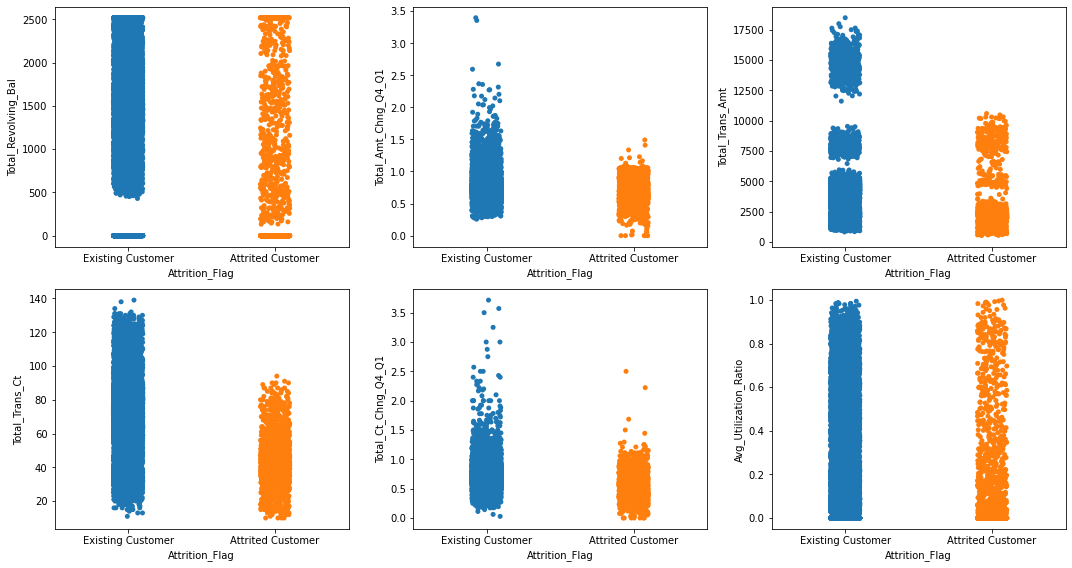

In [24]:
# Stripplot to explore distribution
# Churning customers have lower values in these independent variables

plt.figure(figsize=(15, 8))
for i in range(len(numlist)):
    plt.subplot(2, 3, i+1)
    sns.stripplot(x='Attrition_Flag', y=numlist[i], data=churn_num)
plt.tight_layout()

In [25]:
# Attrited customers have lower mean in these independent variables
# It is reasonable that customers with higher Total_Trans_Amt and Total_Trans_Ct are less likely to churn

# Churning customers have lower value of Change_Q4_Q1 (per count and per amount) 
# Seems like Change_Q4_Q1 values were calculated as percentage: no negative change (possible due to spending more in holiday season)

churn.groupby('Attrition_Flag')[numlist].mean()

,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,
Attrited Customer,672.822987,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,1256.604118,0.772510,4654.655882,68.672588,0.742434,0.296412


In [26]:
# It is interest that if customers have total_revolving_bal less than $429 (except for $0), they are extremely likely to churn

non_churn.Total_Revolving_Bal.value_counts().sort_index().head()

0      1577
429       1
451       1
456       1
461       1
Name: Total_Revolving_Bal, dtype: int64

### Correlation

In [27]:
# Convert Attrition_Flag to 0 (Existing Customer ) and 1 (Attrited Customer) to explore correlation

churn_num['Attrition_Flag'] = churn.Attrition_Flag.map({'Existing Customer':0, 'Attrited Customer':1})

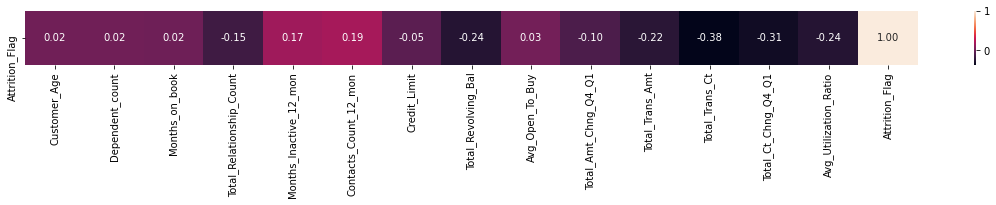

In [28]:
# Heatmap with Spearman correlation: 
# The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; 
# While Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships

churn_num_corr = pd.DataFrame(index=['Attrition_Flag'],columns=churn_num.columns)
columns = churn_num.columns
for i in range(0, len(columns)):
    r, p = ss.spearmanr(churn_num.Attrition_Flag, churn_num[columns[i]])
    churn_num_corr.loc[:, columns[i]] = r
churn_num_corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(churn_num_corr,annot=True,fmt='.2f')
plt.show()

##### Strong negative correlation:
Total_Relationship_Count: Customers are less likely to churn if they have more product with the card issuers. <br />
Total_Revolving_Bal: Customers keep their unpaid balance low are more likely to churn. <br />
Total_Trans_Amt, Total_Trans_Ct, Avg_Utilization_Ratio: this is rational since customers with low usage have higher chance of churning. <br />
Total_Ct_Chng_Q4_Q1: this variable is also indicating customers with low usage are more likely to churn. <br />

#### Strong positive correlation:
Months_inactive_12_mon: This make sense intuitively that the more inactive months within a year, the more likely customers leave. <br />
Contacts_Count_12_mon: This is rational since customers usually call due to problems with their cards and services. <br />

<AxesSubplot:>

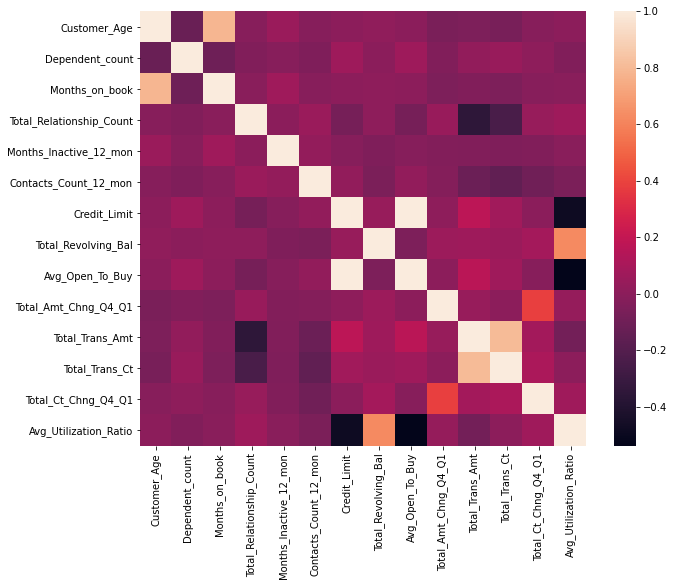

In [29]:
# Explore correlation between independent variables

plt.figure(figsize=(10, 8))
sns.heatmap(churn.corr())

Strong positive correlation: Months_on_book vs Customer_Age, Total_Trans_Ct vs Total_Trans_Amt <br />
Strong negative correlation: Credit_Limit and Avg_Open_To_Buy vs Avg_Utilization_Ratio, Total_Trans_Amt vs Total_Relationship_Count <br />
There is small degree of multicollinearity in the dataset <br />